In [2]:
import pandas as pd

import pyspark
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler


This is spark version..


coba-coba spark


In [18]:
type(pd.read_csv('teams.csv'))

pandas.core.frame.DataFrame

In [4]:
spark = SparkSession.builder.appName('Practice').getOrCreate()

In [5]:
spark

In [23]:
df_pyspark=spark.read.csv('teams.csv')

In [24]:
df_pyspark.show()

+----+----+--------+------+----+------+------+-----------+------+
| _c0| _c1|     _c2|   _c3| _c4|   _c5|   _c6|        _c7|   _c8|
+----+----+--------+------+----+------+------+-----------+------+
|team|year|athletes|events| age|height|weight|prev_medals|medals|
| AFG|1964|       8|     8|22.0| 161.0|  64.2|        0.0|     0|
| AFG|1968|       5|     5|23.2| 170.2|  70.0|        0.0|     0|
| AFG|1972|       8|     8|29.0| 168.3|  63.8|        0.0|     0|
| AFG|1980|      11|    11|23.6| 168.4|  63.2|        0.0|     0|
| AFG|2004|       5|     5|18.6| 170.8|  64.8|        0.0|     0|
| AFG|2008|       4|     4|22.5| 179.2|  62.8|        0.0|     1|
| AFG|2012|       6|     6|24.8| 171.7|  60.8|        1.0|     1|
| AFG|2016|       3|     3|24.7| 173.7|  74.0|        1.0|     0|
| AHO|1964|       4|     4|28.5| 171.2|  69.4|        0.0|     0|
| AHO|1968|       5|     4|31.0| 173.2|  67.8|        0.0|     0|
| AHO|1972|       2|     2|38.5| 164.0|  86.0|        0.0|     0|
| AHO|1976

In [28]:
df_pyspark=spark.read.option('header', 'True').csv('teams.csv')

In [30]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [32]:
df_pyspark.printSchema()

root
 |-- team: string (nullable = true)
 |-- year: string (nullable = true)
 |-- athletes: string (nullable = true)
 |-- events: string (nullable = true)
 |-- age: string (nullable = true)
 |-- height: string (nullable = true)
 |-- weight: string (nullable = true)
 |-- prev_medals: string (nullable = true)
 |-- medals: string (nullable = true)



akhir dari coba-coba


In [6]:
spark= SparkSession.builder.appName('BelajarRegresiDiSpark').getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/10 08:22:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
# Create fake data
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=5, noise=1, random_state=42)
print(X.shape)
print(y.shape)

(1000, 5)
(1000,)


In [9]:
# convert to pandas:
data = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
data['label'] = y
print(data)

     feature_0  feature_1  feature_2  feature_3  feature_4      label
0     2.056544   0.606851   0.482688  -1.130888   0.420094  74.529768
1    -0.799192  -0.645964  -0.182896  -0.482744   1.374876 -42.554556
2     1.076007  -0.796026  -0.751969   0.021312  -0.319054 -25.348101
3    -0.103255  -0.828497   1.489863  -1.643189  -1.600904 -86.770922
4    -2.063403   0.503252  -0.645572  -0.317350  -1.661083 -85.874608
..         ...        ...        ...        ...        ...        ...
995   0.689708  -1.292263   1.749584  -0.502975   1.381454   4.170422
996   0.645216   0.521122  -0.054894   0.555604   0.285554  61.185770
997   0.499685   0.239405   1.487246   0.472002  -0.580053  51.307660
998  -0.641487   0.019148  -0.661982   0.487872   0.425887  -8.595079
999   0.915390  -0.833056  -1.776246  -0.549540  -0.080600 -57.195629

[1000 rows x 6 columns]


In [10]:
# Convert to Spark DataFrame
spark_data = spark.createDataFrame(data)
print(spark_data)

DataFrame[feature_0: double, feature_1: double, feature_2: double, feature_3: double, feature_4: double, label: double]


In [11]:
spark_data.show(20)

+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|           feature_0|           feature_1|           feature_2|           feature_3|           feature_4|              label|
+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|  2.0565435648295414|   0.606850593215671|  0.4826878872092127| -1.1308884353259157|  0.4200944904518413|   74.5297677603984|
| -0.7991920066502536| -0.6459641791245353|-0.18289644110484016| -0.4827435221820324|  1.3748764191481848| -42.55455597038837|
|  1.0760071385985983|  -0.796025856803489| -0.7519693317388191| 0.02131164867194222|-0.31905393566661816|-25.348100881045564|
|-0.10325476014904739|  -0.828497024780246|  1.4898634386020821| -1.6431888111541673| -1.6009039784765156| -86.77092227705603|
| -2.0634031524794545|  0.5032520647495048|  -0.645572072035395| -0.3173504922425348| -1.6610834155671725| -85.

In [13]:
# Gabung semua features dalam 1 kolom

assembler = VectorAssembler(inputCols=[f"feature_{i}" for i in range(X.shape[1])],
                            outputCol="features")
assembled_data = assembler.transform(spark_data).select("features", "label")
assembled_data.show(5)

+--------------------+-------------------+
|            features|              label|
+--------------------+-------------------+
|[2.05654356482954...|   74.5297677603984|
|[-0.7991920066502...| -42.55455597038837|
|[1.07600713859859...|-25.348100881045564|
|[-0.1032547601490...| -86.77092227705603|
|[-2.0634031524794...| -85.87460799877226|
+--------------------+-------------------+
only showing top 5 rows



In [14]:
assembled_data.show(5, truncate=False)

+-----------------------------------------------------------------------------------------------------+-------------------+
|features                                                                                             |label              |
+-----------------------------------------------------------------------------------------------------+-------------------+
|[2.0565435648295414,0.606850593215671,0.4826878872092127,-1.1308884353259157,0.4200944904518413]     |74.5297677603984   |
|[-0.7991920066502536,-0.6459641791245353,-0.18289644110484016,-0.4827435221820324,1.3748764191481848]|-42.55455597038837 |
|[1.0760071385985983,-0.796025856803489,-0.7519693317388191,0.02131164867194222,-0.31905393566661816] |-25.348100881045564|
|[-0.10325476014904739,-0.828497024780246,1.4898634386020821,-1.6431888111541673,-1.6009039784765156] |-86.77092227705603 |
|[-2.0634031524794545,0.5032520647495048,-0.645572072035395,-0.3173504922425348,-1.6610834155671725]  |-85.87460799877226 |
+-------

Ordinary Least Square (OLS)

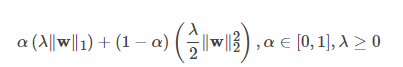

Catatan: alpha = elasticNetParam, lambda = regParam


In [18]:
elaPar = 0.0
regPar = 0.0
ols = LinearRegression(featuresCol="features", 
                       labelCol="label",
                       elasticNetParam=elaPar,
                       regParam=regPar)
ols_model = ols.fit(assembled_data)
print(f"OLS Coefficients: {ols_model.coefficients}")
print(f"OLS Intercept: {ols_model.intercept}")

24/06/10 08:52:36 WARN Instrumentation: [5d0c72a6] regParam is zero, which might cause numerical instability and overfitting.


OLS Coefficients: [28.570936618002833,46.05824998775978,16.802480061005266,24.72486156021683,19.031020252425204]
OLS Intercept: -0.061714660140790606


Ridge


In [20]:
elaPar = 0.0
regPar = 0.1
ridge = LinearRegression(featuresCol="features", 
                       labelCol="label",
                       elasticNetParam=elaPar,
                       regParam=regPar)
ridge_model = ridge.fit(assembled_data)
print(f"Ridge Coefficients: {ridge_model.coefficients}")
print(f"Ridge Intercept: {ridge_model.intercept}")

Ridge Coefficients: [28.525093658118383,45.988100605637875,16.780198779569925,24.686659585088716,18.999932950725753]
Ridge Intercept: -0.060347831355858854


Lasso


In [21]:
elaPar = 1.0
regPar = 0.1
lasso = LinearRegression(featuresCol="features", 
                       labelCol="label",
                       elasticNetParam=elaPar,
                       regParam=regPar)
lasso_model = lasso.fit(assembled_data)
print(f"Lasso Coefficients: {lasso_model.coefficients}")
print(f"Lasso Intercept: {lasso_model.intercept}")

Lasso Coefficients: [28.461400198125272,45.963320598542175,16.70637979575537,24.624531268358076,18.929591686913184]
Lasso Intercept: -0.058893240644149365


In [22]:
elaPar = 0.5
regPar = 0.1
elastic_net = LinearRegression(featuresCol="features", 
                       labelCol="label",
                       elasticNetParam=elaPar,
                       regParam=regPar)
elastic_net_model = elastic_net.fit(assembled_data)
print(f"Elastic-Net Coefficients: {elastic_net_model.coefficients}")
print(f"Elastic-Net Intercept: {elastic_net_model.intercept}")

Elastic-Net Coefficients: [28.493272924810093,45.97571878333301,16.743317790462054,24.6556191059137,18.964790487693556]
Elastic-Net Intercept: -0.05962107297935225
